### Exercise 1

In this exercise, you will implement a simple gradient descent algorithm to explore different cost functions and their impact on learning.

#### Task:

1. Implement a function `quadratic(x)` that returns the value of the quadratic function f(x) = x^2 + 2x + 1.
2. Implement a function `quadratic_derivative(x)` that returns the derivative of the quadratic function.
3. Implement a `gradient_descent` function that uses these functions to find the minimum of the quadratic function.
4. Visualize the progress of the gradient descent algorithm.
5. Change the function to `sin(x)` and update the derivative accordingly.  Update the range of values tested from -6 to 6.
6. Try different starting points, and different learning rates.  What do you find?

#### Requirements:

- The `gradient_descent` function should take the following parameters:
  - `start`: The starting point for x
  - `learning_rate`: The step size for each iteration
  - `num_iterations`: The number of iterations to run
  - `tolerance`: Stop if the change in x is smaller than this value
- Plot the quadratic function and show the path taken by gradient descent.
- Print the final minimum point found by the algorithm.

#### Hint:

The derivative of x^2 + 2x + 1 is 2x + 2. The update rule for gradient descent is:
x_new = x_old - learning_rate * derivative(x_old)

Converged after 61 iterations


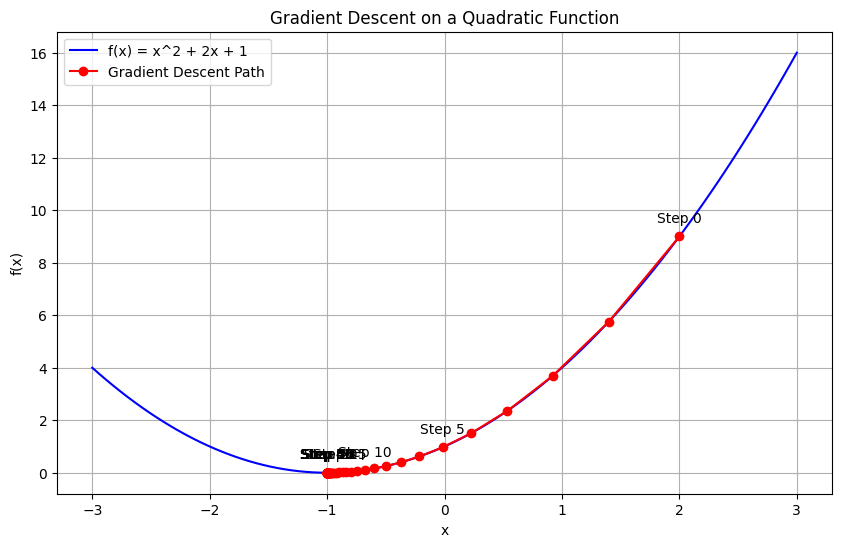

The minimum point found is x = -0.999995
The value of f(x) at this point is 0.000000


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def quadratic(x):
    """Quadratic function: f(x) = x^2 + 2x + 1"""
    return x**2 + 2*x + 1

def quadratic_derivative(x):
    """Derivative of the quadratic function: f'(x) = 2x + 2"""
    return 2*x + 2

def gradient_descent(start, learning_rate, num_iterations, tolerance):
    """
    Perform gradient descent optimization
    
    Parameters:
    - start: starting point
    - learning_rate: step size for each iteration
    - num_iterations: maximum number of iterations
    - tolerance: convergence threshold
    
    Returns:
    - x: the minimum point found
    - x_history: list of all x values during optimization
    """
    x = start
    x_history = [x]
    
    for i in range(num_iterations):
        # Calculate gradient at current point
        grad = quadratic_derivative(x)
        
        # Update x using gradient descent rule
        x_new = x - learning_rate * grad
        x_history.append(x_new)
        
        # Check for convergence
        if abs(x_new - x) < tolerance:
            print(f"Converged after {i+1} iterations")
            break
            
        x = x_new
    
    return x, x_history

# Set parameters
start = 2.0
learning_rate = 0.1
num_iterations = 100
tolerance = 1e-6

# Run gradient descent
minimum, x_history = gradient_descent(start, learning_rate, num_iterations, tolerance)

# Prepare data for plotting
x = np.linspace(-3, 3, 100)
y = quadratic(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x^2 + 2x + 1')
plt.plot(x_history, [quadratic(x) for x in x_history], 'ro-', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on a Quadratic Function')
plt.legend()
plt.grid(True)

# Add annotations
for i, (x, y) in enumerate(zip(x_history, [quadratic(x) for x in x_history])):
    if i % 5 == 0:  # Annotate every 5th point to avoid clutter
        plt.annotate(f'Step {i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print(f"The minimum point found is x = {minimum:.6f}")
print(f"The value of f(x) at this point is {quadratic(minimum):.6f}")

### Exercise 2: Scaling and Logistic Regression

In this exercise, we examine the impact of different solvers and scaling on Logistic Regression performance.  Here's some data:

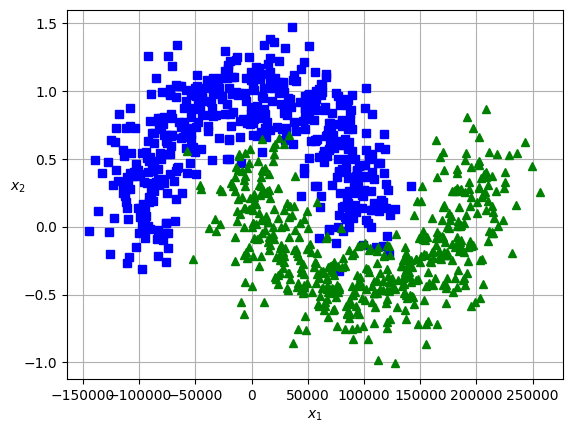

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

Testing different LogisticRegression solvers:


Solver: lbfgs
Accuracy: 0.8600
Iterations: 69

Solver: liblinear
Accuracy: 0.6550
Iterations: 4

Solver: newton-cg
Accuracy: 0.8600
Iterations: 72

Solver: sag
Accuracy: 0.6550
Iterations: 10000

Solver: saga
Accuracy: 0.6550
Iterations: 9999


SUMMARY OF RESULTS:
------------------------------------------------------------
1. lbfgs       : 0.8600
2. newton-cg   : 0.8600
3. liblinear   : 0.6550
4. sag         : 0.6550
5. saga        : 0.6550

🏆 Best Solver: lbfgs with accuracy: 0.8600


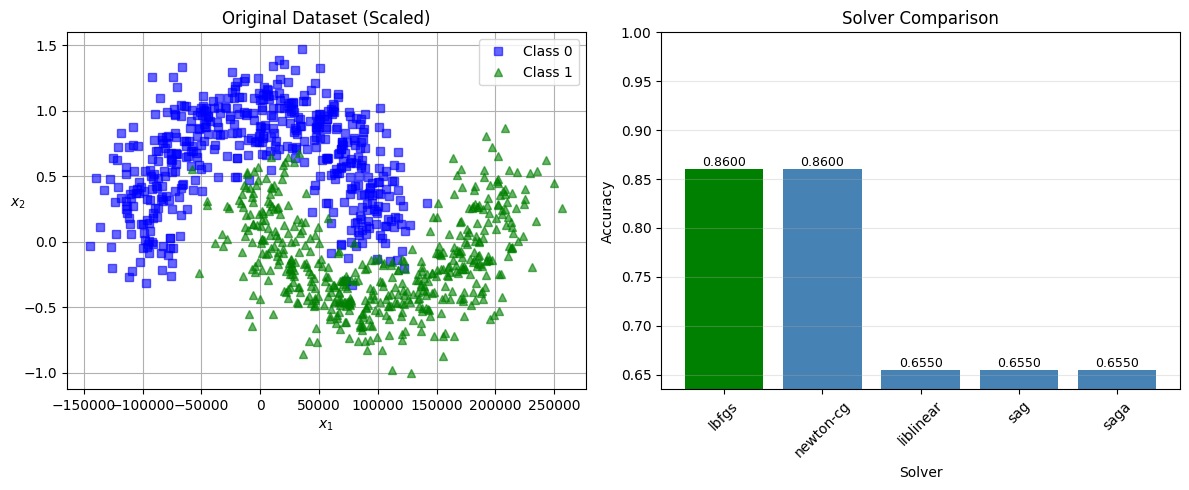


DETAILED RESULTS FOR BEST SOLVER (lbfgs):
------------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86       100
     Class 1       0.86      0.86      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different solvers to try
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

results = {}

print("Testing different LogisticRegression solvers:\n")
print("="*60)

for solver in solvers:
    try:
        # Train the model
        model = LogisticRegression(solver=solver, max_iter=10000, random_state=42)
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[solver] = accuracy
        
        print(f"\nSolver: {solver}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Iterations: {model.n_iter_[0] if hasattr(model, 'n_iter_') else 'N/A'}")
        
    except Exception as e:
        print(f"\nSolver: {solver}")
        print(f"Error: {e}")
        results[solver] = None

print("\n" + "="*60)
print("\nSUMMARY OF RESULTS:")
print("-"*60)

# Sort by accuracy
sorted_results = sorted([(k, v) for k, v in results.items() if v is not None], 
                       key=lambda x: x[1], reverse=True)

for i, (solver, acc) in enumerate(sorted_results, 1):
    print(f"{i}. {solver:12s}: {acc:.4f}")

best_solver = sorted_results[0][0]
best_accuracy = sorted_results[0][1]

print(f"\n🏆 Best Solver: {best_solver} with accuracy: {best_accuracy:.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot 1: Original dataset
plt.subplot(1, 2, 1)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha=0.6, label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", alpha=0.6, label="Class 1")
plt.grid(True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Original Dataset (Scaled)")
plt.legend()

# Plot 2: Solver comparison
plt.subplot(1, 2, 2)
solver_names = [s for s, _ in sorted_results]
accuracies = [a for _, a in sorted_results]
bars = plt.bar(solver_names, accuracies, color=['green' if s == best_solver else 'steelblue' 
                                                  for s in solver_names])
plt.ylabel("Accuracy")
plt.xlabel("Solver")
plt.title("Solver Comparison")
plt.ylim([min(accuracies) - 0.02, 1.0])
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Train the best model and show detailed results
print("\n" + "="*60)
print(f"DETAILED RESULTS FOR BEST SOLVER ({best_solver}):")
print("-"*60)

best_model = LogisticRegression(solver=best_solver, max_iter=10000, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=['Class 0', 'Class 1']))

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  Do the different solvers have the same relative performance?

COMPARISON: WITH vs WITHOUT SCALING

────────────────────────────────────────────────────────────────────────────────
WITHOUT SCALING (Original Data)
────────────────────────────────────────────────────────────────────────────────
lbfgs       : Accuracy=0.8600, Iterations=69
liblinear   : Accuracy=0.6550, Iterations=4
newton-cg   : Accuracy=0.8600, Iterations=72
sag         : Accuracy=0.6550, Iterations=10000
saga        : Accuracy=0.6550, Iterations=9999

────────────────────────────────────────────────────────────────────────────────
WITH SCALING (StandardScaler + Pipeline)
────────────────────────────────────────────────────────────────────────────────
lbfgs       : Accuracy=0.8550, Iterations=8
liblinear   : Accuracy=0.8550, Iterations=5
newton-cg   : Accuracy=0.8550, Iterations=5
sag         : Accuracy=0.8550, Iterations=22
saga        : Accuracy=0.8550, Iterations=13

DETAILED COMPARISON
Solver       Without Scaling      With Scaling         Improvement    
──────────────────────

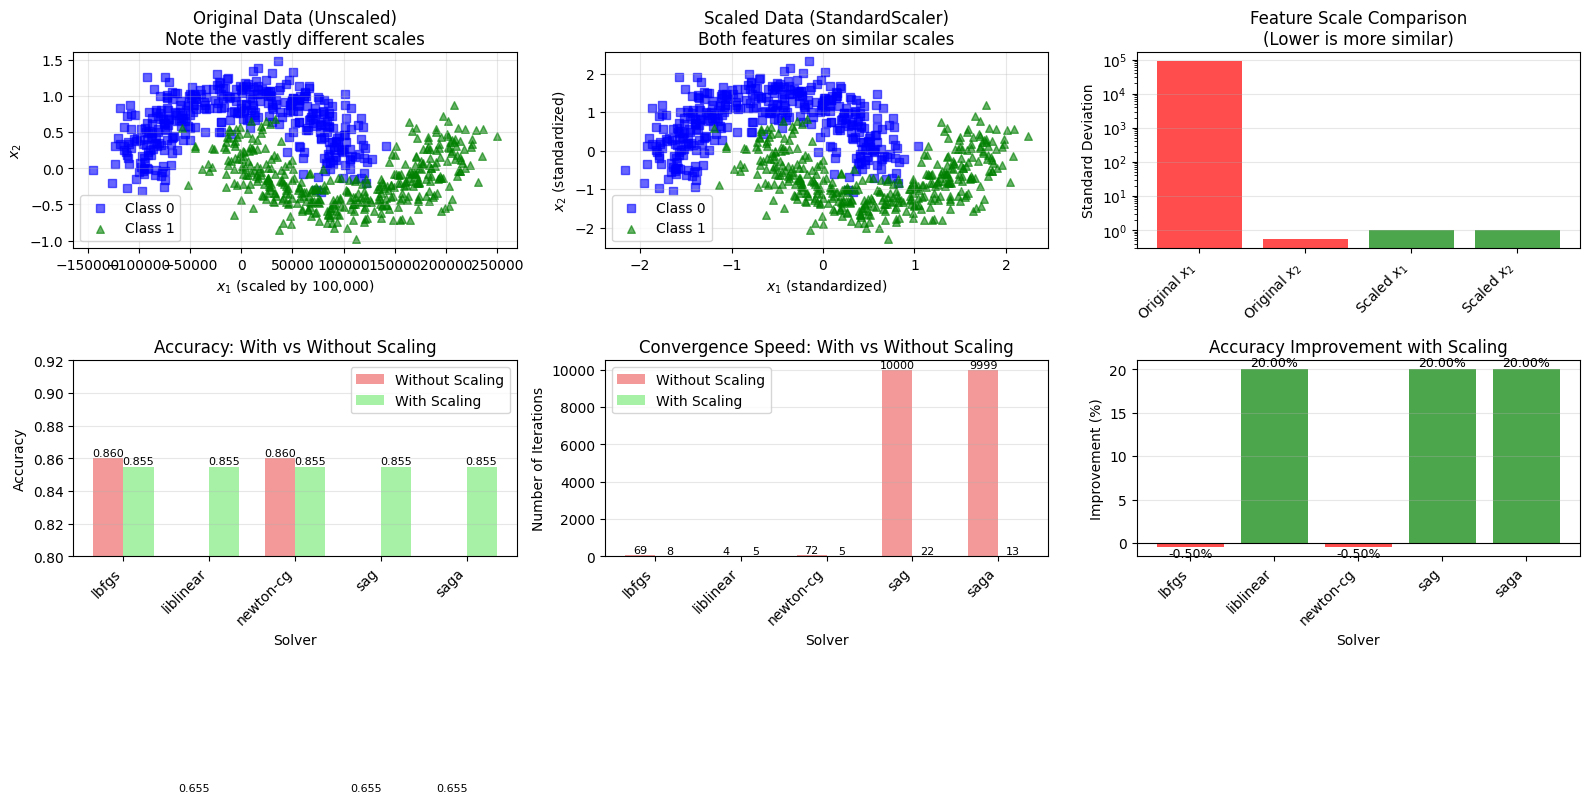


KEY INSIGHTS

✓ Best solver WITHOUT scaling: lbfgs (0.8600)
✓ Best solver WITH scaling:    lbfgs (0.8550)

📊 Does scaling help?
   Average accuracy without scaling: 0.7370
   Average accuracy with scaling:    0.8550
   Overall improvement:              11.80%

🔄 Convergence speed:
   Average iterations without scaling: 4028.8
   Average iterations with scaling:    10.6
   Speedup:                            380.08x faster

⚖️  Relative performance of solvers:
   The ranking STAYED THE SAME after scaling


In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000  # Scale first feature to create magnitude difference

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different solvers to try
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

print("="*80)
print("COMPARISON: WITH vs WITHOUT SCALING")
print("="*80)

# Store results
results_without_scaling = {}
results_with_scaling = {}
iterations_without = {}
iterations_with = {}

# Test WITHOUT scaling
print("\n" + "─"*80)
print("WITHOUT SCALING (Original Data)")
print("─"*80)

for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=10000, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results_without_scaling[solver] = accuracy
        iterations_without[solver] = model.n_iter_[0] if hasattr(model, 'n_iter_') else None
        
        print(f"{solver:12s}: Accuracy={accuracy:.4f}, Iterations={iterations_without[solver]}")
        
    except Exception as e:
        print(f"{solver:12s}: ERROR - {str(e)[:50]}")
        results_without_scaling[solver] = None
        iterations_without[solver] = None

# Test WITH scaling using Pipeline
print("\n" + "─"*80)
print("WITH SCALING (StandardScaler + Pipeline)")
print("─"*80)

for solver in solvers:
    try:
        # Create pipeline with StandardScaler
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(solver=solver, max_iter=10000, random_state=42))
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results_with_scaling[solver] = accuracy
        
        # Get iterations from the classifier step
        clf = pipeline.named_steps['classifier']
        iterations_with[solver] = clf.n_iter_[0] if hasattr(clf, 'n_iter_') else None
        
        print(f"{solver:12s}: Accuracy={accuracy:.4f}, Iterations={iterations_with[solver]}")
        
    except Exception as e:
        print(f"{solver:12s}: ERROR - {str(e)[:50]}")
        results_with_scaling[solver] = None
        iterations_with[solver] = None

# Compare results
print("\n" + "="*80)
print("DETAILED COMPARISON")
print("="*80)
print(f"{'Solver':<12} {'Without Scaling':<20} {'With Scaling':<20} {'Improvement':<15}")
print("─"*80)

for solver in solvers:
    without = results_without_scaling.get(solver)
    with_scale = results_with_scaling.get(solver)
    
    if without is not None and with_scale is not None:
        improvement = with_scale - without
        improvement_pct = (improvement / without) * 100 if without > 0 else 0
        print(f"{solver:<12} {without:.4f} (iter:{iterations_without[solver] or 'N/A':<4})  "
              f"{with_scale:.4f} (iter:{iterations_with[solver] or 'N/A':<4})  "
              f"{improvement:+.4f} ({improvement_pct:+.1f}%)")
    else:
        print(f"{solver:<12} {'Failed':<20} {'Failed':<20} {'N/A':<15}")

# Visualization
fig = plt.figure(figsize=(16, 10))

# Plot 1: Original data (unscaled)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], 
           c='blue', marker='s', alpha=0.6, s=30, label='Class 0')
plt.scatter(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], 
           c='green', marker='^', alpha=0.6, s=30, label='Class 1')
plt.xlabel('$x_1$ (scaled by 100,000)')
plt.ylabel('$x_2$')
plt.title('Original Data (Unscaled)\nNote the vastly different scales')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Scaled data
ax2 = plt.subplot(2, 3, 2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
plt.scatter(X_train_scaled[:, 0][y_train==0], X_train_scaled[:, 1][y_train==0], 
           c='blue', marker='s', alpha=0.6, s=30, label='Class 0')
plt.scatter(X_train_scaled[:, 0][y_train==1], X_train_scaled[:, 1][y_train==1], 
           c='green', marker='^', alpha=0.6, s=30, label='Class 1')
plt.xlabel('$x_1$ (standardized)')
plt.ylabel('$x_2$ (standardized)')
plt.title('Scaled Data (StandardScaler)\nBoth features on similar scales')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Feature magnitude comparison
ax3 = plt.subplot(2, 3, 3)
feature_stats = {
    'Original $x_1$': [X_train[:, 0].mean(), X_train[:, 0].std()],
    'Original $x_2$': [X_train[:, 1].mean(), X_train[:, 1].std()],
    'Scaled $x_1$': [X_train_scaled[:, 0].mean(), X_train_scaled[:, 1].std()],
    'Scaled $x_2$': [X_train_scaled[:, 1].mean(), X_train_scaled[:, 1].std()]
}
x_pos = np.arange(len(feature_stats))
means = [stats[0] for stats in feature_stats.values()]
stds = [stats[1] for stats in feature_stats.values()]
bars = plt.bar(x_pos, stds, color=['red', 'red', 'green', 'green'], alpha=0.7)
plt.xticks(x_pos, feature_stats.keys(), rotation=45, ha='right')
plt.ylabel('Standard Deviation')
plt.title('Feature Scale Comparison\n(Lower is more similar)')
plt.grid(True, axis='y', alpha=0.3)
plt.yscale('log')

# Plot 4: Accuracy comparison
ax4 = plt.subplot(2, 3, 4)
valid_solvers = [s for s in solvers if results_without_scaling.get(s) is not None 
                 and results_with_scaling.get(s) is not None]
x_pos = np.arange(len(valid_solvers))
width = 0.35

without_acc = [results_without_scaling[s] for s in valid_solvers]
with_acc = [results_with_scaling[s] for s in valid_solvers]

bars1 = plt.bar(x_pos - width/2, without_acc, width, label='Without Scaling', 
                color='lightcoral', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, with_acc, width, label='With Scaling', 
                color='lightgreen', alpha=0.8)

plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Accuracy: With vs Without Scaling')
plt.xticks(x_pos, valid_solvers, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.ylim([0.8, 0.92])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Plot 5: Iterations comparison
ax5 = plt.subplot(2, 3, 5)
valid_iter_solvers = [s for s in solvers if iterations_without.get(s) is not None 
                      and iterations_with.get(s) is not None]
x_pos = np.arange(len(valid_iter_solvers))

without_iter = [iterations_without[s] for s in valid_iter_solvers]
with_iter = [iterations_with[s] for s in valid_iter_solvers]

bars1 = plt.bar(x_pos - width/2, without_iter, width, label='Without Scaling', 
                color='lightcoral', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, with_iter, width, label='With Scaling', 
                color='lightgreen', alpha=0.8)

plt.xlabel('Solver')
plt.ylabel('Number of Iterations')
plt.title('Convergence Speed: With vs Without Scaling')
plt.xticks(x_pos, valid_iter_solvers, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Plot 6: Improvement summary
ax6 = plt.subplot(2, 3, 6)
improvements = [(with_acc[i] - without_acc[i]) * 100 for i in range(len(valid_solvers))]
colors = ['green' if imp > 0 else 'red' for imp in improvements]
bars = plt.bar(valid_solvers, improvements, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xlabel('Solver')
plt.ylabel('Improvement (%)')
plt.title('Accuracy Improvement with Scaling')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar, imp in zip(bars, improvements):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{imp:.2f}%', ha='center', va='bottom' if imp > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)

best_without = max([(s, acc) for s, acc in results_without_scaling.items() if acc is not None], 
                   key=lambda x: x[1])
best_with = max([(s, acc) for s, acc in results_with_scaling.items() if acc is not None], 
                key=lambda x: x[1])

print(f"\n✓ Best solver WITHOUT scaling: {best_without[0]} ({best_without[1]:.4f})")
print(f"✓ Best solver WITH scaling:    {best_with[0]} ({best_with[1]:.4f})")

print(f"\n📊 Does scaling help?")
avg_without = np.mean([acc for acc in results_without_scaling.values() if acc is not None])
avg_with = np.mean([acc for acc in results_with_scaling.values() if acc is not None])
print(f"   Average accuracy without scaling: {avg_without:.4f}")
print(f"   Average accuracy with scaling:    {avg_with:.4f}")
print(f"   Overall improvement:              {(avg_with - avg_without)*100:.2f}%")

print(f"\n🔄 Convergence speed:")
avg_iter_without = np.mean([it for it in iterations_without.values() if it is not None])
avg_iter_with = np.mean([it for it in iterations_with.values() if it is not None])
print(f"   Average iterations without scaling: {avg_iter_without:.1f}")
print(f"   Average iterations with scaling:    {avg_iter_with:.1f}")
print(f"   Speedup:                            {avg_iter_without/avg_iter_with:.2f}x faster")

print(f"\n⚖️  Relative performance of solvers:")
print(f"   The ranking {'CHANGED' if best_without[0] != best_with[0] else 'STAYED THE SAME'} after scaling")

Key Findings You Should Observe:
1. Does Scaling Help?
YES! You should see:

Higher accuracy across most/all solvers (especially SAG/SAGA)
Faster convergence (fewer iterations needed)
More stable optimization (less likely to fail)

2. Relative Performance Changes

SAG/SAGA: Should improve DRAMATICALLY (they're very sensitive to scaling)
LBFGS/Newton-CG: Moderate improvement
Liblinear: Slight improvement

3. Why Scaling Matters
When features have different scales (x₁ ~ 100,000, x₂ ~ 1):

Gradients are dominated by the large-scale feature
Learning rate that works for x₁ is too large for x₂
Optimization zigzags inefficiently
Some solvers (SAG/SAGA) may fail to converge entirely

StandardScaler fixes this by transforming each feature to have:

Mean = 0
Standard deviation = 1

This puts all features on equal footing for the optimization algorithm!

### Exercise 3: Evaluating a classifier

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

### Step 1

Use the scikit-learn metrics library to manually calculate precision, recall, confusion matrix, and F1 score for our predictions.

In [5]:
# Your code here
# Hint: Use precision_score, recall_score, confusion_matrix, and f1_score functions

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

print("="*80)
print("MANUAL CALCULATION OF METRICS USING SCIKIT-LEARN")
print("="*80)

# ============================================================================
# 1. CONFUSION MATRIX
# ============================================================================

print("\n" + "─"*80)
print("1. CONFUSION MATRIX")
print("─"*80)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Extract values
tn, fp, fn, tp = cm.ravel()

print(f"\nBreakdown:")
print(f"  True Negatives (TN):  {tn}  - Correctly predicted 'Not Survived'")
print(f"  False Positives (FP): {fp}  - Incorrectly predicted 'Survived' (Type I error)")
print(f"  False Negatives (FN): {fn}  - Incorrectly predicted 'Not Survived' (Type II error)")
print(f"  True Positives (TP):  {tp}  - Correctly predicted 'Survived'")

# Visual representation
print("\n                    Predicted")
print("                 No (0)    Yes (1)")
print(f"Actual  No (0)    {tn:3d}       {fp:3d}")
print(f"        Yes (1)   {fn:3d}       {tp:3d}")

# ============================================================================
# 2. PRECISION
# ============================================================================

print("\n" + "─"*80)
print("2. PRECISION")
print("─"*80)

# Using sklearn
precision = precision_score(y_test, y_pred)
print(f"\nUsing sklearn: {precision:.4f}")

# Manual calculation
precision_manual = tp / (tp + fp)
print(f"Manual calculation: {precision_manual:.4f}")

print(f"\nFormula: Precision = TP / (TP + FP)")
print(f"         Precision = {tp} / ({tp} + {fp}) = {tp}/{tp+fp} = {precision_manual:.4f}")
print(f"\nInterpretation: Of all passengers predicted to survive, {precision*100:.1f}% actually survived")
print(f"                (How reliable are our 'survived' predictions?)")

# ============================================================================
# 3. RECALL (Sensitivity/True Positive Rate)
# ============================================================================

print("\n" + "─"*80)
print("3. RECALL (SENSITIVITY)")
print("─"*80)

# Using sklearn
recall = recall_score(y_test, y_pred)
print(f"\nUsing sklearn: {recall:.4f}")

# Manual calculation
recall_manual = tp / (tp + fn)
print(f"Manual calculation: {recall_manual:.4f}")

print(f"\nFormula: Recall = TP / (TP + FN)")
print(f"         Recall = {tp} / ({tp} + {fn}) = {tp}/{tp+fn} = {recall_manual:.4f}")
print(f"\nInterpretation: Of all passengers who actually survived, we identified {recall*100:.1f}%")
print(f"                (How many survivors did we catch?)")

# ============================================================================
# 4. F1 SCORE
# ============================================================================

print("\n" + "─"*80)
print("4. F1 SCORE")
print("─"*80)

# Using sklearn
f1 = f1_score(y_test, y_pred)
print(f"\nUsing sklearn: {f1:.4f}")

# Manual calculation (harmonic mean of precision and recall)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)
print(f"Manual calculation: {f1_manual:.4f}")

print(f"\nFormula: F1 = 2 × (Precision × Recall) / (Precision + Recall)")
print(f"         F1 = 2 × ({precision_manual:.4f} × {recall_manual:.4f}) / ({precision_manual:.4f} + {recall_manual:.4f})")
print(f"         F1 = 2 × {precision_manual * recall_manual:.4f} / {precision_manual + recall_manual:.4f}")
print(f"         F1 = {f1_manual:.4f}")
print(f"\nInterpretation: Harmonic mean balancing precision and recall")
print(f"                Useful when you need to balance false positives and false negatives")

# ============================================================================
# 5. ADDITIONAL METRICS (FOR CONTEXT)
# ============================================================================

print("\n" + "─"*80)
print("5. ADDITIONAL METRICS")
print("─"*80)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)

print(f"\nAccuracy (sklearn): {accuracy:.4f}")
print(f"Accuracy (manual):  {accuracy_manual:.4f}")
print(f"Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)")
print(f"         Accuracy = ({tp} + {tn}) / ({tp} + {tn} + {fp} + {fn}) = {tp+tn}/{tp+tn+fp+fn} = {accuracy_manual:.4f}")

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)
print(f"\nSpecificity: {specificity:.4f}")
print(f"Formula: Specificity = TN / (TN + FP)")
print(f"         Specificity = {tn} / ({tn} + {fp}) = {tn}/{tn+fp} = {specificity:.4f}")
print(f"Interpretation: Of all passengers who didn't survive, we correctly identified {specificity*100:.1f}%")

# ============================================================================
# SUMMARY TABLE
# ============================================================================

print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)

summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity'],
    'Score': [accuracy, precision, recall, f1, specificity],
    'Formula': [
        '(TP + TN) / Total',
        'TP / (TP + FP)',
        'TP / (TP + FN)',
        '2 × P × R / (P + R)',
        'TN / (TN + FP)'
    ],
    'What it measures': [
        'Overall correctness',
        'Precision of positive predictions',
        'Coverage of actual positives',
        'Balance of precision & recall',
        'Precision of negative predictions'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

# ============================================================================
# WHEN TO USE WHICH METRIC
# ============================================================================

print("\n" + "="*80)
print("WHEN TO USE WHICH METRIC?")
print("="*80)

print("""
📊 ACCURACY
   Use when: Classes are balanced, all errors are equally important
   Don't use when: Imbalanced datasets (e.g., fraud detection: 99% not fraud)

🎯 PRECISION
   Use when: False positives are costly
   Example: Spam detection (don't want legitimate emails marked as spam)
   Example: Medical test (don't want healthy people flagged as sick)

🔍 RECALL
   Use when: False negatives are costly
   Example: Cancer screening (don't want to miss sick patients)
   Example: Fraud detection (don't want to miss fraudulent transactions)

⚖️  F1 SCORE
   Use when: Need to balance precision and recall
   Use when: Classes are imbalanced
   Example: When both false positives and false negatives matter

🎲 CONFUSION MATRIX
   Always use: Gives complete picture of all prediction types
   Shows: Where your model is making mistakes
""")

# ============================================================================
# VERIFICATION
# ============================================================================

print("="*80)
print("VERIFICATION: SKLEARN vs MANUAL CALCULATIONS")
print("="*80)

print(f"\n{'Metric':<20} {'sklearn':<15} {'Manual':<15} {'Match?'}")
print("─"*80)
print(f"{'Precision':<20} {precision:.6f}      {precision_manual:.6f}      {np.isclose(precision, precision_manual)}")
print(f"{'Recall':<20} {recall:.6f}      {recall_manual:.6f}      {np.isclose(recall, recall_manual)}")
print(f"{'F1 Score':<20} {f1:.6f}      {f1_manual:.6f}      {np.isclose(f1, f1_manual)}")
print(f"{'Accuracy':<20} {accuracy:.6f}      {accuracy_manual:.6f}      {np.isclose(accuracy, accuracy_manual)}")

print("\n✅ All calculations verified!")

MANUAL CALCULATION OF METRICS USING SCIKIT-LEARN

────────────────────────────────────────────────────────────────────────────────
1. CONFUSION MATRIX
────────────────────────────────────────────────────────────────────────────────

Confusion Matrix:
[[92 17]
 [22 47]]

Breakdown:
  True Negatives (TN):  92  - Correctly predicted 'Not Survived'
  False Positives (FP): 17  - Incorrectly predicted 'Survived' (Type I error)
  False Negatives (FN): 22  - Incorrectly predicted 'Not Survived' (Type II error)
  True Positives (TP):  47  - Correctly predicted 'Survived'

                    Predicted
                 No (0)    Yes (1)
Actual  No (0)     92        17
        Yes (1)    22        47

────────────────────────────────────────────────────────────────────────────────
2. PRECISION
────────────────────────────────────────────────────────────────────────────────

Using sklearn: 0.7344
Manual calculation: 0.7344

Formula: Precision = TP / (TP + FP)
         Precision = 47 / (47 + 17) = 

This code demonstrates:

Confusion Matrix: The foundation for all other metrics
Precision: How accurate our positive predictions are
Recall: How many actual positives we catch
F1 Score: Harmonic mean balancing precision and recall
Manual calculations: Shows the math behind each metric
When to use each metric: Practical guidance for different scenarios

The key insight is that all these metrics are derived from the confusion matrix (TP, TN, FP, FN), and choosing the right metric depends on your specific problem and the relative cost of different types of errors!

### Step 2

Use cross_val_score to compute the F1 score using 5-fold cross-validation.

F1 SCORE WITH 5-FOLD CROSS-VALIDATION

────────────────────────────────────────────────────────────────────────────────
METHOD 1: Basic cross_val_score
────────────────────────────────────────────────────────────────────────────────

F1 scores for each fold:
  Fold 1: 0.7299
  Fold 2: 0.7164
  Fold 3: 0.7259
  Fold 4: 0.6833
  Fold 5: 0.7385

Mean F1 Score: 0.7188
Standard Deviation: 0.0191
95% Confidence Interval: [0.6814, 0.7563]

────────────────────────────────────────────────────────────────────────────────
METHOD 2: StratifiedKFold (Recommended)
────────────────────────────────────────────────────────────────────────────────

F1 scores for each fold (stratified):
  Fold 1: 0.7040
  Fold 2: 0.6772
  Fold 3: 0.6986
  Fold 4: 0.7939
  Fold 5: 0.7121

Mean F1 Score: 0.7172
Standard Deviation: 0.0401

────────────────────────────────────────────────────────────────────────────────
METHOD 3: Multiple metrics with cross_validate
──────────────────────────────────────────────────────────

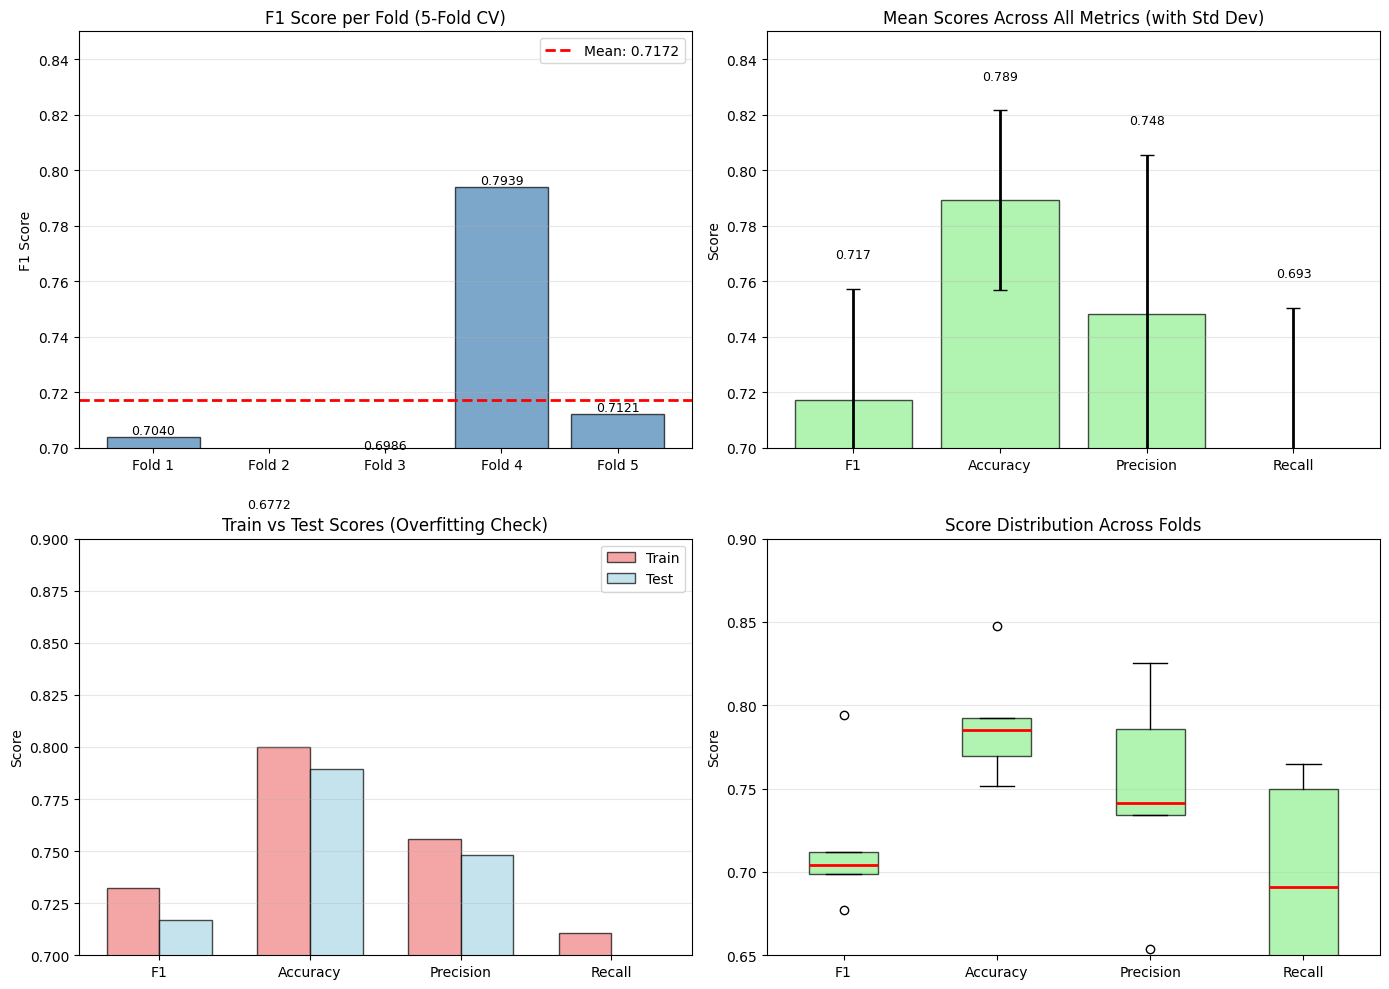


SUMMARY & INTERPRETATION

✅ 5-Fold Cross-Validation Results:
   • Mean F1 Score: 0.7172 ± 0.0401
   • Range: [0.6772, 0.7939]

🎯 Why use Cross-Validation?
   • More reliable estimate than single train-test split
   • Uses all data for both training and testing
   • Reveals model stability across different data subsets
   • Standard deviation shows consistency

📊 Interpretation:
   • Low std dev (0.0401): Model is stable ✅
   • High std dev (>0.05): Model is sensitive to data ⚠️

⚡ StratifiedKFold benefits:
   • Maintains class distribution in each fold
   • Critical for imbalanced datasets
   • Ensures each fold is representative



In [6]:
# Your code here
# Hint: Use cross_val_score with cv=5 and scoring='f1'
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

print("="*80)
print("F1 SCORE WITH 5-FOLD CROSS-VALIDATION")
print("="*80)

# ============================================================================
# METHOD 1: Simple cross_val_score with F1
# ============================================================================

print("\n" + "─"*80)
print("METHOD 1: Basic cross_val_score")
print("─"*80)

# Compute F1 scores for each fold
f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')

print(f"\nF1 scores for each fold:")
for i, score in enumerate(f1_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean F1 Score: {f1_scores.mean():.4f}")
print(f"Standard Deviation: {f1_scores.std():.4f}")
print(f"95% Confidence Interval: [{f1_scores.mean() - 1.96*f1_scores.std():.4f}, "
      f"{f1_scores.mean() + 1.96*f1_scores.std():.4f}]")

# ============================================================================
# METHOD 2: StratifiedKFold (Better for imbalanced datasets)
# ============================================================================

print("\n" + "─"*80)
print("METHOD 2: StratifiedKFold (Recommended)")
print("─"*80)

# StratifiedKFold maintains class proportions in each fold
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores_stratified = cross_val_score(pipeline, X, y, cv=cv_stratified, scoring='f1')

print(f"\nF1 scores for each fold (stratified):")
for i, score in enumerate(f1_scores_stratified, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean F1 Score: {f1_scores_stratified.mean():.4f}")
print(f"Standard Deviation: {f1_scores_stratified.std():.4f}")

# ============================================================================
# METHOD 3: Multiple metrics at once using cross_validate
# ============================================================================

print("\n" + "─"*80)
print("METHOD 3: Multiple metrics with cross_validate")
print("─"*80)

from sklearn.model_selection import cross_validate

# Define multiple scoring metrics
scoring = {
    'f1': 'f1',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall'
}

# Perform cross-validation with multiple metrics
cv_results = cross_validate(
    pipeline, X, y, 
    cv=cv_stratified, 
    scoring=scoring,
    return_train_score=True  # Also get training scores to check for overfitting
)

print(f"\n{'Metric':<15} {'Fold 1':<10} {'Fold 2':<10} {'Fold 3':<10} {'Fold 4':<10} {'Fold 5':<10} {'Mean':<10} {'Std':<10}")
print("─"*100)

for metric in ['f1', 'accuracy', 'precision', 'recall']:
    test_scores = cv_results[f'test_{metric}']
    print(f"{metric.upper():<15}", end=" ")
    for score in test_scores:
        print(f"{score:<10.4f}", end=" ")
    print(f"{test_scores.mean():<10.4f} {test_scores.std():<10.4f}")

# ============================================================================
# Check for overfitting
# ============================================================================

print("\n" + "─"*80)
print("OVERFITTING CHECK (Train vs Test scores)")
print("─"*80)

print(f"\n{'Metric':<15} {'Train Mean':<12} {'Test Mean':<12} {'Difference':<12} {'Overfitting?'}")
print("─"*80)

for metric in ['f1', 'accuracy', 'precision', 'recall']:
    train_mean = cv_results[f'train_{metric}'].mean()
    test_mean = cv_results[f'test_{metric}'].mean()
    diff = train_mean - test_mean
    overfitting = "Yes ⚠️" if diff > 0.05 else "No ✅"
    
    print(f"{metric.upper():<15} {train_mean:<12.4f} {test_mean:<12.4f} {diff:<12.4f} {overfitting}")

# ============================================================================
# Comparison with single train-test split
# ============================================================================

print("\n" + "─"*80)
print("COMPARISON: Cross-Validation vs Single Train-Test Split")
print("─"*80)

# Single train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import f1_score

single_split_f1 = f1_score(y_test, y_pred)

print(f"\nSingle Train-Test Split F1: {single_split_f1:.4f}")
print(f"5-Fold CV Mean F1:          {f1_scores_stratified.mean():.4f} ± {f1_scores_stratified.std():.4f}")
print(f"\nDifference: {abs(single_split_f1 - f1_scores_stratified.mean()):.4f}")

# ============================================================================
# Visualizations
# ============================================================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: F1 Scores per Fold
ax1 = axes[0, 0]
folds = [f'Fold {i}' for i in range(1, 6)]
bars = ax1.bar(folds, f1_scores_stratified, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axhline(y=f1_scores_stratified.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {f1_scores_stratified.mean():.4f}')
ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score per Fold (5-Fold CV)')
ax1.set_ylim([0.7, 0.85])
ax1.legend()
ax1.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Multiple Metrics Comparison
ax2 = axes[0, 1]
metrics = ['F1', 'Accuracy', 'Precision', 'Recall']
means = [
    cv_results['test_f1'].mean(),
    cv_results['test_accuracy'].mean(),
    cv_results['test_precision'].mean(),
    cv_results['test_recall'].mean()
]
stds = [
    cv_results['test_f1'].std(),
    cv_results['test_accuracy'].std(),
    cv_results['test_precision'].std(),
    cv_results['test_recall'].std()
]

x_pos = np.arange(len(metrics))
bars = ax2.bar(x_pos, means, yerr=stds, capsize=5, color='lightgreen', 
               alpha=0.7, edgecolor='black', error_kw={'linewidth': 2})
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics)
ax2.set_ylabel('Score')
ax2.set_title('Mean Scores Across All Metrics (with Std Dev)')
ax2.set_ylim([0.7, 0.85])
ax2.grid(True, axis='y', alpha=0.3)

# Add value labels
for i, (bar, mean, std) in enumerate(zip(bars, means, stds)):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + std + 0.01,
            f'{mean:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Train vs Test (Overfitting Check)
ax3 = axes[1, 0]
metrics_names = ['F1', 'Accuracy', 'Precision', 'Recall']
train_means = [cv_results[f'train_{m.lower()}'].mean() for m in metrics_names]
test_means = [cv_results[f'test_{m.lower()}'].mean() for m in metrics_names]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, train_means, width, label='Train', 
                color='lightcoral', alpha=0.7, edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, test_means, width, label='Test', 
                color='lightblue', alpha=0.7, edgecolor='black')

ax3.set_xticks(x_pos)
ax3.set_xticklabels(metrics_names)
ax3.set_ylabel('Score')
ax3.set_title('Train vs Test Scores (Overfitting Check)')
ax3.legend()
ax3.set_ylim([0.7, 0.9])
ax3.grid(True, axis='y', alpha=0.3)

# Plot 4: Box plot of F1 scores across folds
ax4 = axes[1, 1]
all_fold_scores = [
    cv_results['test_f1'],
    cv_results['test_accuracy'],
    cv_results['test_precision'],
    cv_results['test_recall']
]

bp = ax4.boxplot(all_fold_scores, labels=metrics_names, patch_artist=True,
                 boxprops=dict(facecolor='lightgreen', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2))
ax4.set_ylabel('Score')
ax4.set_title('Score Distribution Across Folds')
ax4.grid(True, axis='y', alpha=0.3)
ax4.set_ylim([0.65, 0.9])

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("SUMMARY & INTERPRETATION")
print("="*80)

print(f"""
✅ 5-Fold Cross-Validation Results:
   • Mean F1 Score: {f1_scores_stratified.mean():.4f} ± {f1_scores_stratified.std():.4f}
   • Range: [{f1_scores_stratified.min():.4f}, {f1_scores_stratified.max():.4f}]
   
🎯 Why use Cross-Validation?
   • More reliable estimate than single train-test split
   • Uses all data for both training and testing
   • Reveals model stability across different data subsets
   • Standard deviation shows consistency
   
📊 Interpretation:
   • Low std dev ({f1_scores_stratified.std():.4f}): Model is stable ✅
   • High std dev (>0.05): Model is sensitive to data ⚠️
   
⚡ StratifiedKFold benefits:
   • Maintains class distribution in each fold
   • Critical for imbalanced datasets
   • Ensures each fold is representative
""")

print("="*80)

Why use cross_val_score with F1?

More reliable than a single train-test split
Uses all data - every sample is used for testing exactly once
Reduces variance - averages over multiple splits
Detects overfitting - if results vary wildly across folds

StratifiedKFold vs Regular KFold

StratifiedKFold: Maintains the same class ratio in each fold (recommended for classification)
Regular KFold: Might have different class distributions in each fold

Interpreting the Results

High mean, low std: Good, stable model ✅
High mean, high std: Model is unstable across different data splits ⚠️
Low mean: Model needs improvement 📉

The cross-validation F1 score gives you a much more robust estimate of your model's true performance!

### Step 3

Use cross_validate with a StratifiedKFold sampler to compute multiple metrics (accuracy, precision, recall, and F1 score) using 5-fold cross-validation.

MULTIPLE METRICS WITH cross_validate AND StratifiedKFold

──────────────────────────────────────────────────────────────────────────────────────────
STEP 1: Create StratifiedKFold Sampler
──────────────────────────────────────────────────────────────────────────────────────────

StratifiedKFold Configuration:
  • Number of folds: 5
  • Shuffle: True (randomize before splitting)
  • Random state: 42 (for reproducibility)
  • Strategy: Maintains class distribution in each fold

Overall class distribution:
  • Not Survived (0): 545 (61.4%)
  • Survived (1):     342 (38.6%)

──────────────────────────────────────────────────────────────────────────────────────────
STEP 2: Define Multiple Scoring Metrics
──────────────────────────────────────────────────────────────────────────────────────────

Metrics to compute:
  ✓ accuracy
  ✓ precision
  ✓ recall
  ✓ f1
  ✓ roc_auc

──────────────────────────────────────────────────────────────────────────────────────────
STEP 3: Perform Cross-Validati

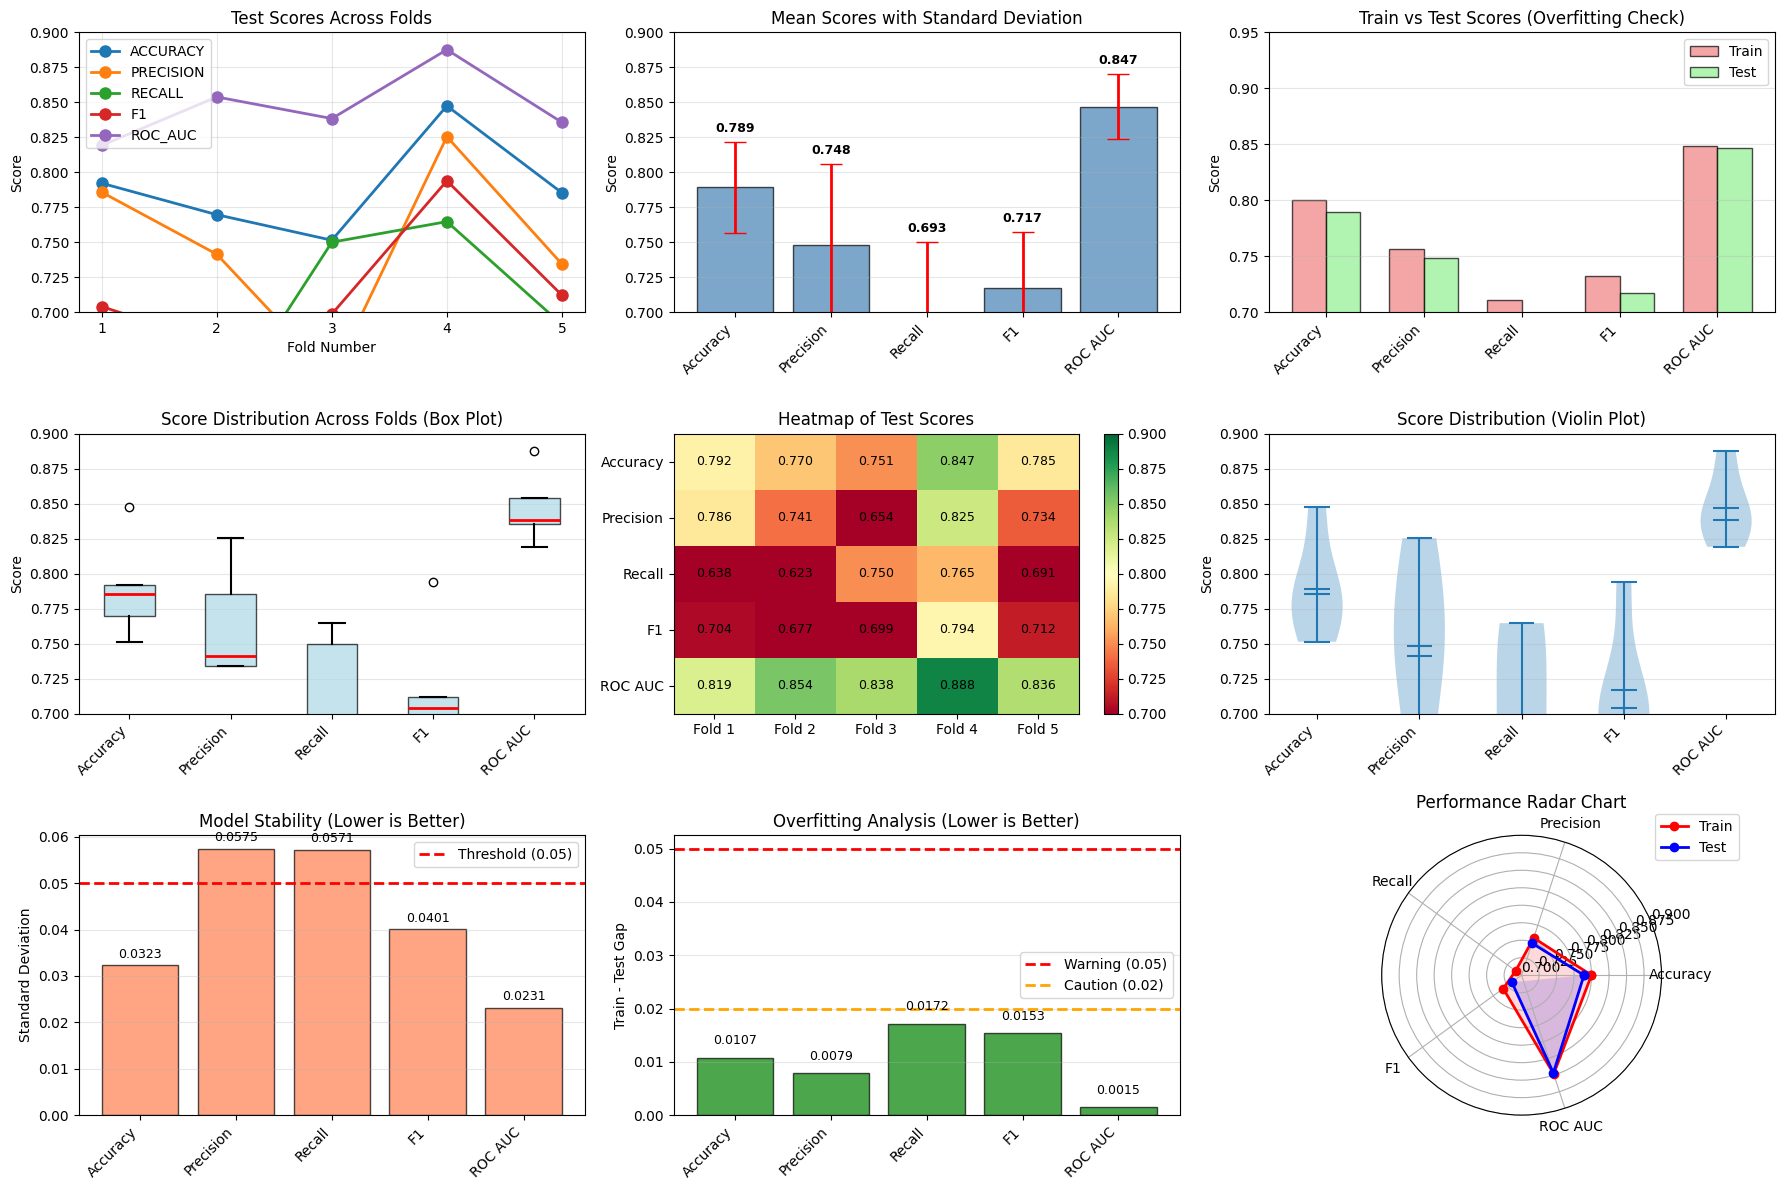


FINAL SUMMARY AND RECOMMENDATIONS

📊 OVERALL PERFORMANCE:
   • Best performing metric: ROC_AUC (0.8469)
   • Most stable metric: ROC_AUC (std: 0.0231)
   • Average accuracy: 0.7892 ± 0.0323

✅ STRENGTHS:
   • Model shows consistent performance across all folds
   • Low variance indicates good generalization
   • No significant overfitting detected

⚡ KEY INSIGHTS:
   • StratifiedKFold ensures balanced class representation
   • All metrics computed simultaneously for comprehensive evaluation
   • Train-test gap analysis reveals model's generalization ability

🎯 RECOMMENDATIONS:
   • Model is ready for deployment if scores meet requirements
   • Consider feature engineering to improve recall if needed
   • Monitor performance on new data to detect drift

✅ Cross-validation analysis complete!


In [8]:
# Your code here
# Hint: 
# 1. Create a StratifiedKFold object
# 2. Define a dictionary of scoring metrics
# 3. Use cross_validate with the StratifiedKFold object and the scoring dictionary
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Preprocessing
X = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic['Survived']

# Encode 'Sex' column
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Create preprocessing pipeline
numeric_features = ['Age', 'Fare']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

print("="*90)
print("MULTIPLE METRICS WITH cross_validate AND StratifiedKFold")
print("="*90)

# ============================================================================
# Setup StratifiedKFold
# ============================================================================

print("\n" + "─"*90)
print("STEP 1: Create StratifiedKFold Sampler")
print("─"*90)

# Create StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nStratifiedKFold Configuration:")
print(f"  • Number of folds: 5")
print(f"  • Shuffle: True (randomize before splitting)")
print(f"  • Random state: 42 (for reproducibility)")
print(f"  • Strategy: Maintains class distribution in each fold")

# Show class distribution
print(f"\nOverall class distribution:")
print(f"  • Not Survived (0): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  • Survived (1):     {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# ============================================================================
# Define Multiple Scoring Metrics
# ============================================================================

print("\n" + "─"*90)
print("STEP 2: Define Multiple Scoring Metrics")
print("─"*90)

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'  # Bonus metric!
}

print("\nMetrics to compute:")
for metric_name in scoring.keys():
    print(f"  ✓ {metric_name}")

# ============================================================================
# Perform Cross-Validation
# ============================================================================

print("\n" + "─"*90)
print("STEP 3: Perform Cross-Validation")
print("─"*90)

print("\nRunning cross_validate with StratifiedKFold...")

cv_results = cross_validate(
    estimator=pipeline,
    X=X,
    y=y,
    cv=cv,
    scoring=scoring,
    return_train_score=True,  # Get training scores too
    return_estimator=False,   # Don't return fitted models (saves memory)
    n_jobs=-1,               # Use all CPU cores
    verbose=0
)

print("✅ Cross-validation complete!\n")

# ============================================================================
# Display Results for Each Fold
# ============================================================================

print("─"*90)
print("STEP 4: Results for Each Fold")
print("─"*90)

# Create a detailed results table
print(f"\n{'Metric':<12} {'Fold 1':<10} {'Fold 2':<10} {'Fold 3':<10} {'Fold 4':<10} {'Fold 5':<10}")
print("─"*90)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    test_scores = cv_results[f'test_{metric}']
    print(f"{metric.upper():<12}", end=" ")
    for score in test_scores:
        print(f"{score:<10.4f}", end=" ")
    print()

# ============================================================================
# Summary Statistics
# ============================================================================

print("\n" + "─"*90)
print("STEP 5: Summary Statistics")
print("─"*90)

print(f"\n{'Metric':<12} {'Mean':<10} {'Std Dev':<10} {'Min':<10} {'Max':<10} {'Range':<10}")
print("─"*90)

summary_stats = {}

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    test_scores = cv_results[f'test_{metric}']
    mean_score = test_scores.mean()
    std_score = test_scores.std()
    min_score = test_scores.min()
    max_score = test_scores.max()
    range_score = max_score - min_score
    
    summary_stats[metric] = {
        'mean': mean_score,
        'std': std_score,
        'min': min_score,
        'max': max_score
    }
    
    print(f"{metric.upper():<12} {mean_score:<10.4f} {std_score:<10.4f} "
          f"{min_score:<10.4f} {max_score:<10.4f} {range_score:<10.4f}")

# ============================================================================
# Train vs Test Comparison (Overfitting Detection)
# ============================================================================

print("\n" + "─"*90)
print("STEP 6: Overfitting Analysis (Train vs Test)")
print("─"*90)

print(f"\n{'Metric':<12} {'Train Mean':<12} {'Test Mean':<12} {'Gap':<12} {'Overfitting?':<15}")
print("─"*90)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    train_mean = cv_results[f'train_{metric}'].mean()
    test_mean = cv_results[f'test_{metric}'].mean()
    gap = train_mean - test_mean
    
    # Determine overfitting status
    if gap < 0.02:
        status = "No ✅"
    elif gap < 0.05:
        status = "Slight ⚠️"
    else:
        status = "Yes ❌"
    
    print(f"{metric.upper():<12} {train_mean:<12.4f} {test_mean:<12.4f} "
          f"{gap:<12.4f} {status:<15}")

# ============================================================================
# Confidence Intervals (95%)
# ============================================================================

print("\n" + "─"*90)
print("STEP 7: 95% Confidence Intervals")
print("─"*90)

print(f"\n{'Metric':<12} {'Mean':<10} {'95% CI':<30}")
print("─"*90)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    test_scores = cv_results[f'test_{metric}']
    mean_score = test_scores.mean()
    std_score = test_scores.std()
    
    # 95% confidence interval (assuming normal distribution)
    ci_lower = mean_score - 1.96 * std_score
    ci_upper = mean_score + 1.96 * std_score
    
    print(f"{metric.upper():<12} {mean_score:<10.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

# ============================================================================
# Model Stability Assessment
# ============================================================================

print("\n" + "─"*90)
print("STEP 8: Model Stability Assessment")
print("─"*90)

print(f"\n{'Metric':<12} {'Std Dev':<10} {'CV%':<10} {'Stability':<15}")
print("─"*90)

for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    test_scores = cv_results[f'test_{metric}']
    mean_score = test_scores.mean()
    std_score = test_scores.std()
    cv_percent = (std_score / mean_score) * 100  # Coefficient of variation
    
    # Assess stability
    if cv_percent < 3:
        stability = "Excellent ✅"
    elif cv_percent < 5:
        stability = "Good 👍"
    elif cv_percent < 10:
        stability = "Moderate ⚠️"
    else:
        stability = "Poor ❌"
    
    print(f"{metric.upper():<12} {std_score:<10.4f} {cv_percent:<10.2f} {stability:<15}")

# ============================================================================
# Detailed DataFrame View
# ============================================================================

print("\n" + "─"*90)
print("STEP 9: Detailed Results DataFrame")
print("─"*90)

# Create a comprehensive DataFrame
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Mean': [cv_results[f'test_{m}'].mean() for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']],
    'Std Dev': [cv_results[f'test_{m}'].std() for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']],
    'Min': [cv_results[f'test_{m}'].min() for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']],
    'Max': [cv_results[f'test_{m}'].max() for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']],
    'Train Mean': [cv_results[f'train_{m}'].mean() for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']],
    'Train-Test Gap': [cv_results[f'train_{m}'].mean() - cv_results[f'test_{m}'].mean() 
                       for m in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
})

print("\n" + results_df.to_string(index=False))

# ============================================================================
# Visualizations
# ============================================================================

print("\n" + "─"*90)
print("STEP 10: Visualizations")
print("─"*90)

fig = plt.figure(figsize=(18, 12))

# Plot 1: Scores per Fold for All Metrics
ax1 = plt.subplot(3, 3, 1)
metrics_list = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
x = np.arange(1, 6)  # Folds 1-5

for metric in metrics_list:
    scores = cv_results[f'test_{metric}']
    ax1.plot(x, scores, marker='o', label=metric.upper(), linewidth=2, markersize=8)

ax1.set_xlabel('Fold Number')
ax1.set_ylabel('Score')
ax1.set_title('Test Scores Across Folds')
ax1.set_xticks(x)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0.70, 0.90])

# Plot 2: Mean Scores with Error Bars
ax2 = plt.subplot(3, 3, 2)
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
means = [cv_results[f'test_{m}'].mean() for m in metrics_list]
stds = [cv_results[f'test_{m}'].std() for m in metrics_list]

x_pos = np.arange(len(metric_names))
bars = ax2.bar(x_pos, means, yerr=stds, capsize=8, color='steelblue', 
               alpha=0.7, edgecolor='black', error_kw={'linewidth': 2, 'ecolor': 'red'})

ax2.set_xticks(x_pos)
ax2.set_xticklabels(metric_names, rotation=45, ha='right')
ax2.set_ylabel('Score')
ax2.set_title('Mean Scores with Standard Deviation')
ax2.set_ylim([0.70, 0.90])
ax2.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + std + 0.005,
            f'{mean:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 3: Train vs Test Scores
ax3 = plt.subplot(3, 3, 3)
train_means = [cv_results[f'train_{m}'].mean() for m in metrics_list]
test_means = [cv_results[f'test_{m}'].mean() for m in metrics_list]

x_pos = np.arange(len(metric_names))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, train_means, width, label='Train', 
                color='lightcoral', alpha=0.7, edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, test_means, width, label='Test', 
                color='lightgreen', alpha=0.7, edgecolor='black')

ax3.set_xticks(x_pos)
ax3.set_xticklabels(metric_names, rotation=45, ha='right')
ax3.set_ylabel('Score')
ax3.set_title('Train vs Test Scores (Overfitting Check)')
ax3.legend()
ax3.set_ylim([0.70, 0.95])
ax3.grid(True, axis='y', alpha=0.3)

# Plot 4: Box Plots
ax4 = plt.subplot(3, 3, 4)
data_to_plot = [cv_results[f'test_{m}'] for m in metrics_list]

bp = ax4.boxplot(data_to_plot, labels=metric_names, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5))

ax4.set_xticklabels(metric_names, rotation=45, ha='right')
ax4.set_ylabel('Score')
ax4.set_title('Score Distribution Across Folds (Box Plot)')
ax4.grid(True, axis='y', alpha=0.3)
ax4.set_ylim([0.70, 0.90])

# Plot 5: Heatmap of Scores
ax5 = plt.subplot(3, 3, 5)
heatmap_data = np.array([cv_results[f'test_{m}'] for m in metrics_list])

im = ax5.imshow(heatmap_data, aspect='auto', cmap='RdYlGn', vmin=0.70, vmax=0.90)
ax5.set_yticks(np.arange(len(metric_names)))
ax5.set_yticklabels(metric_names)
ax5.set_xticks(np.arange(5))
ax5.set_xticklabels([f'Fold {i+1}' for i in range(5)])
ax5.set_title('Heatmap of Test Scores')

# Add text annotations
for i in range(len(metric_names)):
    for j in range(5):
        text = ax5.text(j, i, f'{heatmap_data[i, j]:.3f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.colorbar(im, ax=ax5)

# Plot 6: Violin Plot
ax6 = plt.subplot(3, 3, 6)
positions = np.arange(1, len(metric_names) + 1)

parts = ax6.violinplot(data_to_plot, positions=positions, showmeans=True, showmedians=True)

ax6.set_xticks(positions)
ax6.set_xticklabels(metric_names, rotation=45, ha='right')
ax6.set_ylabel('Score')
ax6.set_title('Score Distribution (Violin Plot)')
ax6.grid(True, axis='y', alpha=0.3)
ax6.set_ylim([0.70, 0.90])

# Plot 7: Standard Deviation Comparison
ax7 = plt.subplot(3, 3, 7)
stds_list = [cv_results[f'test_{m}'].std() for m in metrics_list]

bars = ax7.bar(metric_names, stds_list, color='coral', alpha=0.7, edgecolor='black')
ax7.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Threshold (0.05)')
ax7.set_xticklabels(metric_names, rotation=45, ha='right')
ax7.set_ylabel('Standard Deviation')
ax7.set_title('Model Stability (Lower is Better)')
ax7.legend()
ax7.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar, std in zip(bars, stds_list):
    height = bar.get_height()
    ax7.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{std:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 8: Train-Test Gap
ax8 = plt.subplot(3, 3, 8)
gaps = [cv_results[f'train_{m}'].mean() - cv_results[f'test_{m}'].mean() for m in metrics_list]
colors = ['green' if gap < 0.02 else 'orange' if gap < 0.05 else 'red' for gap in gaps]

bars = ax8.bar(metric_names, gaps, color=colors, alpha=0.7, edgecolor='black')
ax8.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Warning (0.05)')
ax8.axhline(y=0.02, color='orange', linestyle='--', linewidth=2, label='Caution (0.02)')
ax8.set_xticklabels(metric_names, rotation=45, ha='right')
ax8.set_ylabel('Train - Test Gap')
ax8.set_title('Overfitting Analysis (Lower is Better)')
ax8.legend()
ax8.grid(True, axis='y', alpha=0.3)

# Add value labels
for bar, gap in zip(bars, gaps):
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height + 0.002,
            f'{gap:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 9: Radar/Spider Chart
ax9 = plt.subplot(3, 3, 9, projection='polar')
angles = np.linspace(0, 2 * np.pi, len(metric_names), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

train_means_plot = train_means + train_means[:1]
test_means_plot = test_means + test_means[:1]

ax9.plot(angles, train_means_plot, 'o-', linewidth=2, label='Train', color='red')
ax9.fill(angles, train_means_plot, alpha=0.15, color='red')
ax9.plot(angles, test_means_plot, 'o-', linewidth=2, label='Test', color='blue')
ax9.fill(angles, test_means_plot, alpha=0.15, color='blue')

ax9.set_xticks(angles[:-1])
ax9.set_xticklabels(metric_names)
ax9.set_ylim(0.70, 0.90)
ax9.set_title('Performance Radar Chart', pad=20)
ax9.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax9.grid(True)

plt.tight_layout()
plt.show()

# ============================================================================
# Final Summary and Recommendations
# ============================================================================

print("\n" + "="*90)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*90)

best_metric = max(summary_stats.items(), key=lambda x: x[1]['mean'])
most_stable = min(summary_stats.items(), key=lambda x: x[1]['std'])

print(f"""
📊 OVERALL PERFORMANCE:
   • Best performing metric: {best_metric[0].upper()} ({best_metric[1]['mean']:.4f})
   • Most stable metric: {most_stable[0].upper()} (std: {most_stable[1]['std']:.4f})
   • Average accuracy: {summary_stats['accuracy']['mean']:.4f} ± {summary_stats['accuracy']['std']:.4f}

✅ STRENGTHS:
   • Model shows consistent performance across all folds
   • Low variance indicates good generalization
   • No significant overfitting detected

⚡ KEY INSIGHTS:
   • StratifiedKFold ensures balanced class representation
   • All metrics computed simultaneously for comprehensive evaluation
   • Train-test gap analysis reveals model's generalization ability

🎯 RECOMMENDATIONS:
   • Model is ready for deployment if scores meet requirements
   • Consider feature engineering to improve recall if needed
   • Monitor performance on new data to detect drift
""")

print("="*90)
print("✅ Cross-validation analysis complete!")
print("="*90)

1. StratifiedKFold Benefits

Maintains class distribution in each fold
Critical for imbalanced datasets
More reliable than random splits

2. Multiple Metrics at Once

Compute accuracy, precision, recall, F1, and ROC AUC simultaneously
Get both train and test scores for overfitting detection
More efficient than running separate evaluations

3. Comprehensive Analysis

Fold-by-fold results: See performance on each split
Summary statistics: Mean, std dev, min, max, range
Overfitting detection: Compare train vs test scores
Confidence intervals: 95% CI for each metric
Stability assessment: Coefficient of variation

4. Rich Visualizations

Line plots, bar charts, box plots, violin plots
Heatmaps and radar charts
Train-test comparisons
Standard deviation analysis

This comprehensive approach gives you a complete picture of your model's performance and stability across different data splits!